# The main task is looking for dependation between 3 data type: average month temperature and month number vs. month electricity energy usage.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, LinearLocator
import seaborn as sns

In [2]:
energy = pd.read_csv('elusage.csv', index_col = False)

In [3]:
energy.head(10)

,average_temperature,month,average_electricity_usage
0,73,8,24.828
1,67,9,24.688
2,57,10,19.310
3,43,11,59.706
4,26,12,99.667
5,41,1,49.333
6,38,2,59.375
7,46,3,55.172
8,54,4,55.517
9,60,5,25.938


### Getting informations about DataFrame (e.g. inproper/missing values and types of data used)

In [4]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   average_temperature        55 non-null     int64  
 1   month                      55 non-null     int64  
 2   average_electricity_usage  55 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.4 KB


#### **There are no missing values and all of them are numeric types**

### After DataFrame was made and check we need to give it as simple form as possible, so we will make column names shorter by removing useless `'average_'` substring (we know that every number in these 2 columns are the average values calculated from many observations taken during every month).

In [5]:
energy = energy.rename(columns={'average_temperature': 'temperature',
                                'average_electricity_usage': 'electricity_usage'})
print(energy)

    temperature  month  electricity_usage
0            73      8             24.828
1            67      9             24.688
2            57     10             19.310
3            43     11             59.706
4            26     12             99.667
5            41      1             49.333
6            38      2             59.375
7            46      3             55.172
8            54      4             55.517
9            60      5             25.938
10           71      6             20.690
11           75      7             24.333
12           74      8             22.759
13           66      9             24.688
14           61     10             22.759
15           49     11             50.588
16           41     12             79.000
17           35      1             87.188
18           41      2             47.333
19           42      3             38.621
20           56      4             27.931
21           69      5             25.000
22           73      6            

---

## Global plot settings as a function

In [6]:
def global_plot_sets():
    plt.rc('xtick', color = 'k', labelsize = 18)
    plt.rc('ytick', color = 'k', labelsize = 18)
    plt.rc('axes', labelsize = 24, labelpad = 18, titlepad = 12,
           titlesize = 28, facecolor = '#c6c6c6', axisbelow = 'True')
    plt.rc('grid', color = 'w', linestyle = '-.', linewidth = 0.6)
    plt.rc('legend', facecolor = 'w', fontsize = 16)
    plt.rc('xtick.major', size = 8, width = 1)
    plt.rc('xtick.minor', size = 5, width = 1)
    plt.rc('ytick.major', size = 8, width = 1)
    plt.rc('ytick.minor', size = 5, width = 1)

## Plots displaying dependancy between measured data

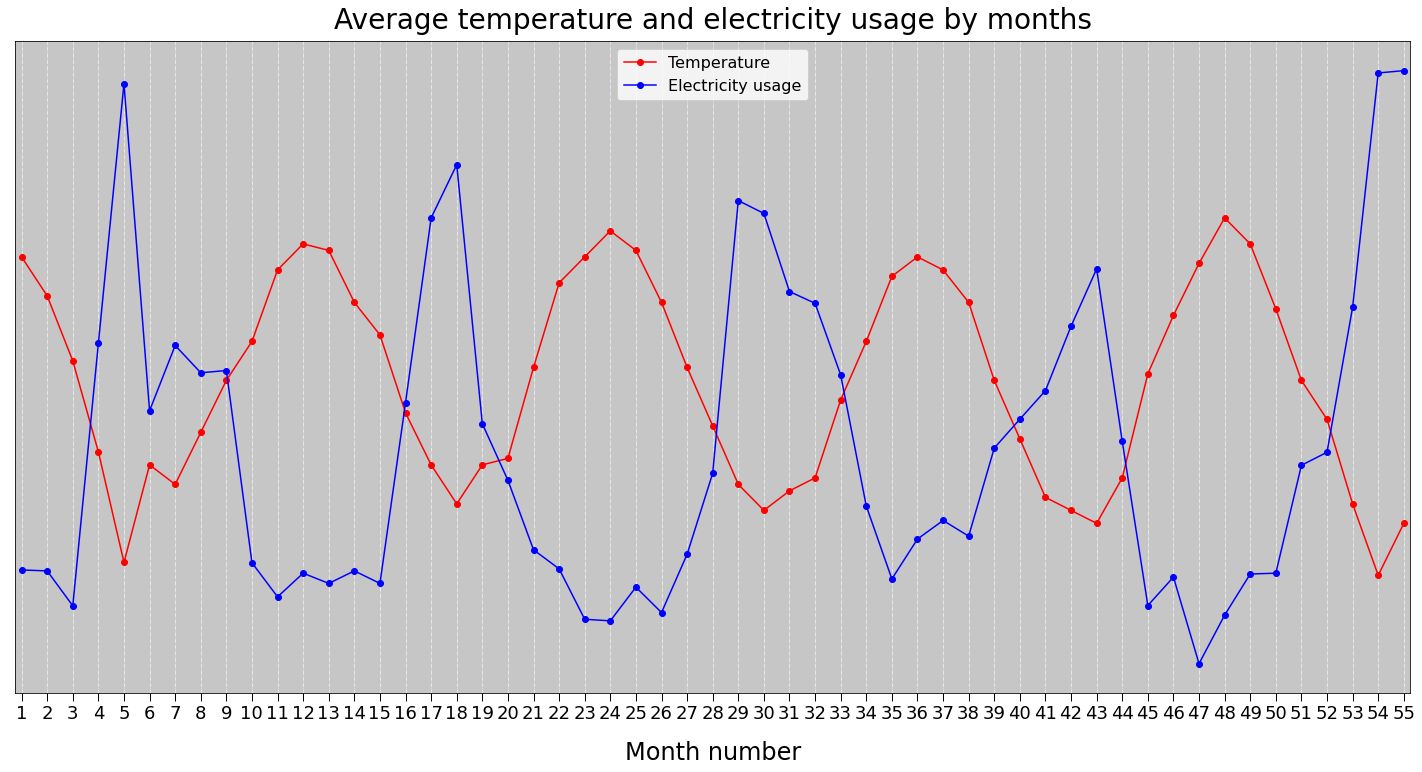

In [7]:
global_plot_sets()
plt.figure(figsize=(25, 12))

# Number of observations in the column
x_range = np.arange(1, len(energy) + 1)

plt.plot(x_range, energy['temperature'], c = 'red', marker = 'o', label = 'Temperature')
plt.plot(x_range, energy['electricity_usage'], c = 'blue', marker = 'o', label = 'Electricity usage')
plt.xlabel('Month number')
plt.xlim(x_range.min() - 0.25, x_range.max() + 0.25)
plt.xticks(x_range)
plt.yticks([])
plt.grid()
plt.title('Average temperature and electricity usage by months')
plt.legend(loc='upper center')

plt.show()

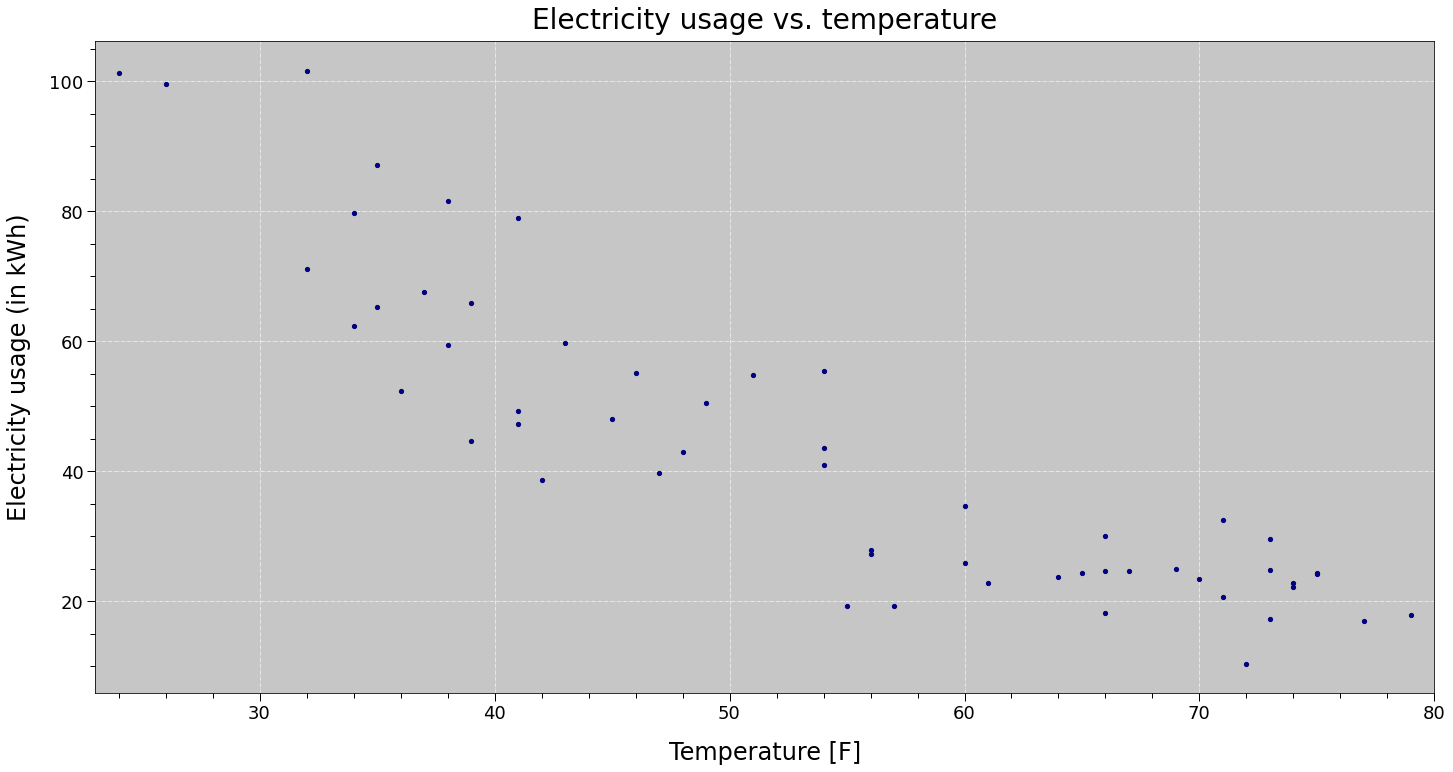

In [8]:
global_plot_sets()
plt.figure(figsize=(24, 12))

plt.scatter(energy['temperature'], energy['electricity_usage'], c = 'navy', marker = 'o', s = 18)
plt.xlabel('Temperature [F]')
plt.ylabel('Electricity usage (in kWh)')
plt.xlim(energy['temperature'].min() - 1, energy['temperature'].max() + 1)
plt.minorticks_on()
plt.grid()
plt.title('Electricity usage vs. temperature')

plt.show()

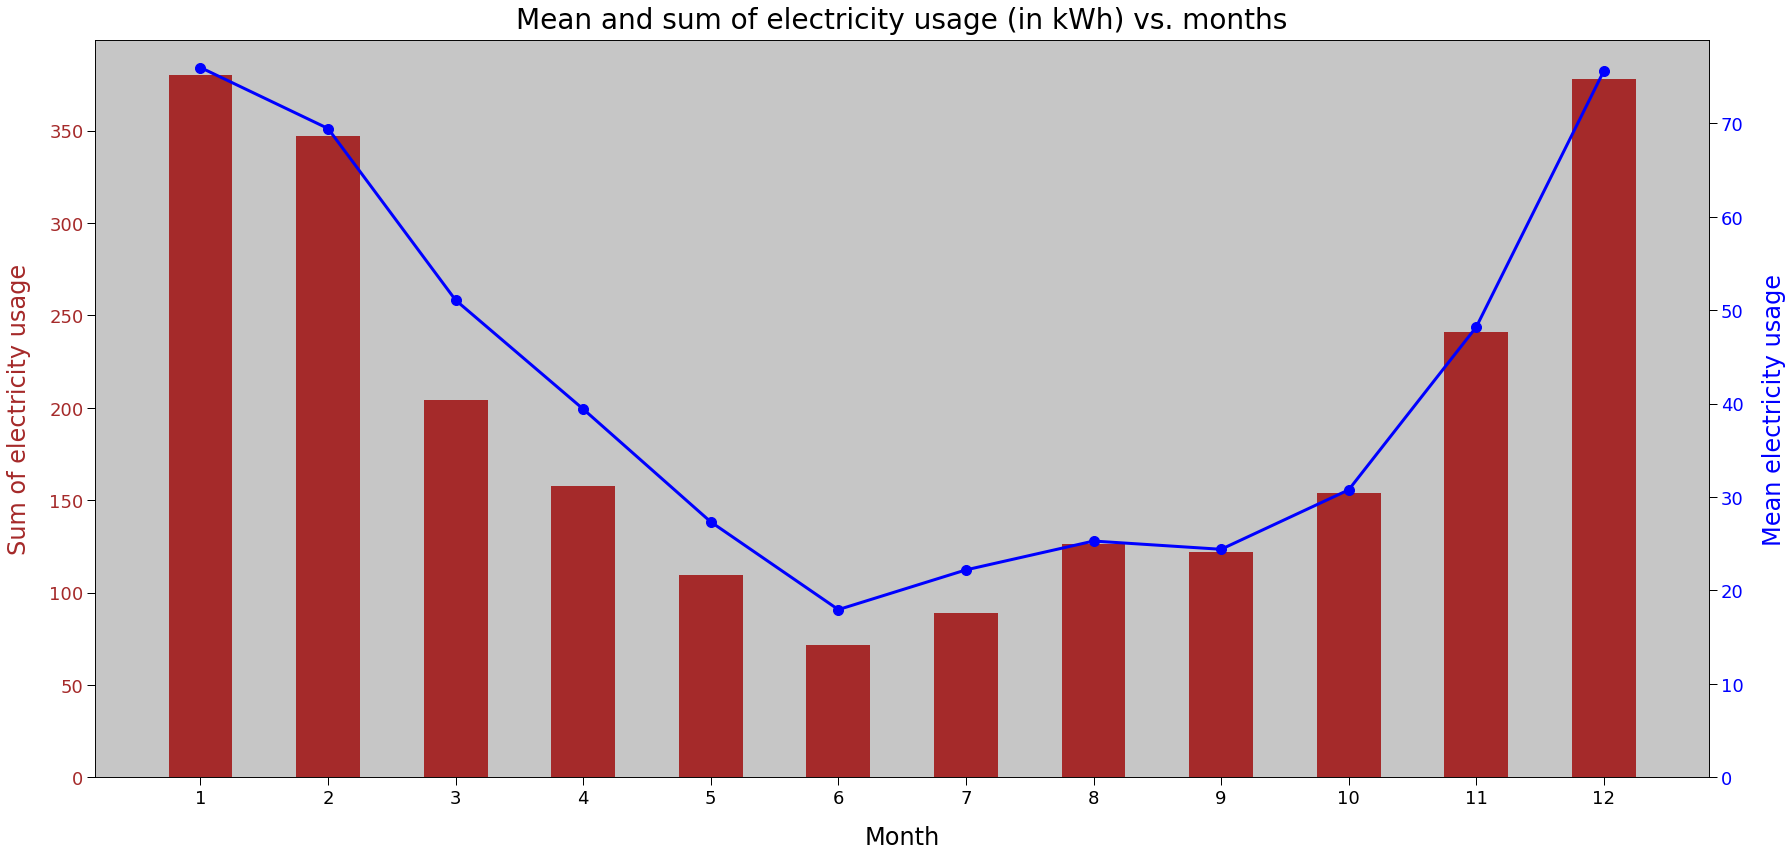

In [9]:
fig, ax1 = plt.subplots(figsize=(25, 12))
ax2 = ax1.twinx()

# Mean and sum values
months_mean_energy_used = energy.groupby('month')['electricity_usage'].mean()
months_sum_energy_used = energy.groupby('month')['electricity_usage'].sum()

month_number = months_sum_energy_used.keys()
w = 0.5   # bar width

ax1.bar(month_number, months_sum_energy_used, width = w, color = 'brown', linewidth=0)
ax2.plot(month_number, months_mean_energy_used, color = 'blue', linewidth=3, marker='o', markersize=10)
ax1.set_xlabel('Month')
ax1.set_ylabel('Sum of electricity usage', color='brown')
ax2.set_ylabel('Mean electricity usage', color='blue')
ax1.tick_params(axis='y', labelcolor='brown')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(ymin=0)
plt.title('Mean and sum of electricity usage (in kWh) vs. months')
ax1.set_xticks(month_number)    

fig.tight_layout()
plt.show()

***

## Looking for *Pearson* and *Spearman correlation*

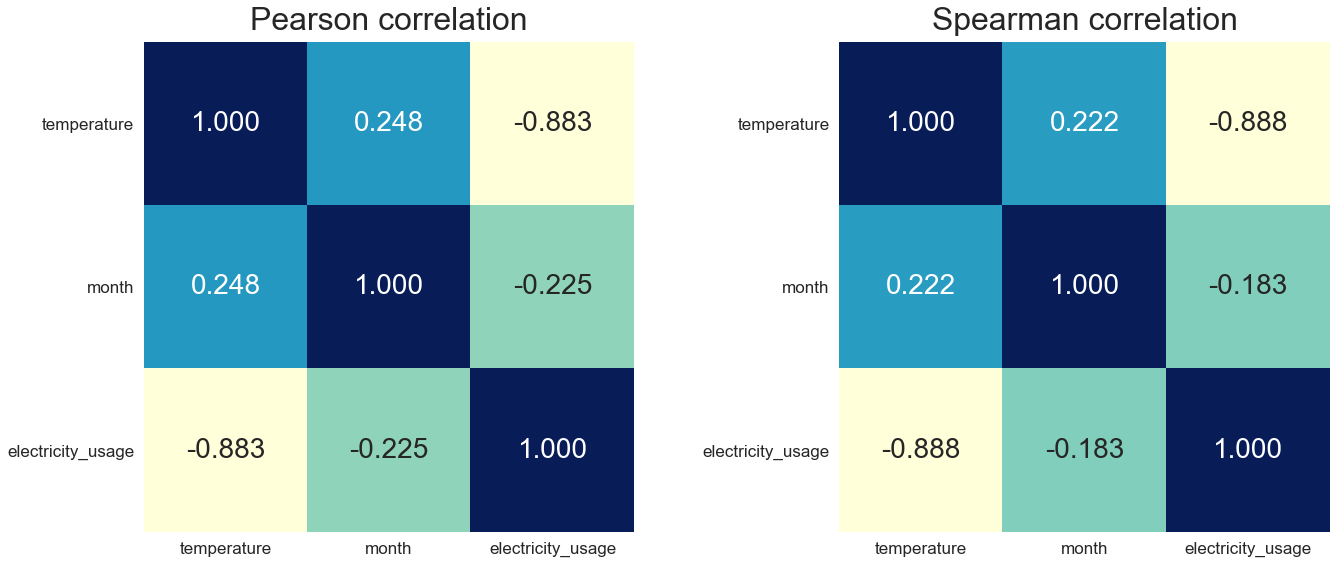

In [10]:
sns.set()

# Draw a heatmap with the numeric values in each cell
fig = plt.figure(figsize=(20, 8))

ax_ = [fig.add_subplot(1, 2, pos) for pos in [1,2]]
correlation_data = [energy.corr(method = option) for option in ['pearson', 'spearman']]
titles_array = ['Pearson correlation', 'Spearman correlation']

# We use axs parameter to tell seaborn which subplot to use for this plot
for axs, data, titles in zip(ax_, correlation_data, titles_array):
    sns.heatmap(data = data, square = True, cmap = "YlGnBu", cbar=False,
                fmt = '.3f', annot = True, annot_kws = {"fontsize": 28}, ax = axs)
    axs.set_xticklabels(ax_[0].get_xticklabels(), fontsize = 17)
    axs.set_yticklabels(ax_[0].get_xticklabels(), fontsize = 17,
                        rotation = 0, ha = "right", rotation_mode = "anchor")
    axs.set_title(titles, fontsize = 32)
    
plt.tight_layout()
plt.show()

## **Conclusions:** 
### - `'month'` vs. `'electricity usage'` do not have enough strong linear and non-linear correlations, although plot show clear cyclical (seasonal) dependancy,
### - `'temperature'` and `'electricity_usage'` have got strong ***Spearman correlation***, so regression will be made using linear algorythms and with decision tree.

---

# **Statistics for data set**

## Compare basic stats for `'temperature'` and `'electricity_usage'` data

In [11]:
energy[['temperature', 'electricity_usage']].describe().round(1)

,temperature,electricity_usage
count,55.0,55.0
mean,53.8,43.3
std,15.5,24.0
min,24.0,10.4
25%,40.0,24.3
50%,54.0,38.6
75%,68.0,57.4
max,79.0,101.7


#### `'temperature'` column data is close to normal distribution, but `'electricity_usage'` is right-skewed (the largest number of observations are on the left side of histogram) - all `'electricity_usage'` observations will be transform by using a few the most common function:
- BoxCox (*normalization*),
- RobustScaler,
- QuantileTransformer,
- minmax_scale.

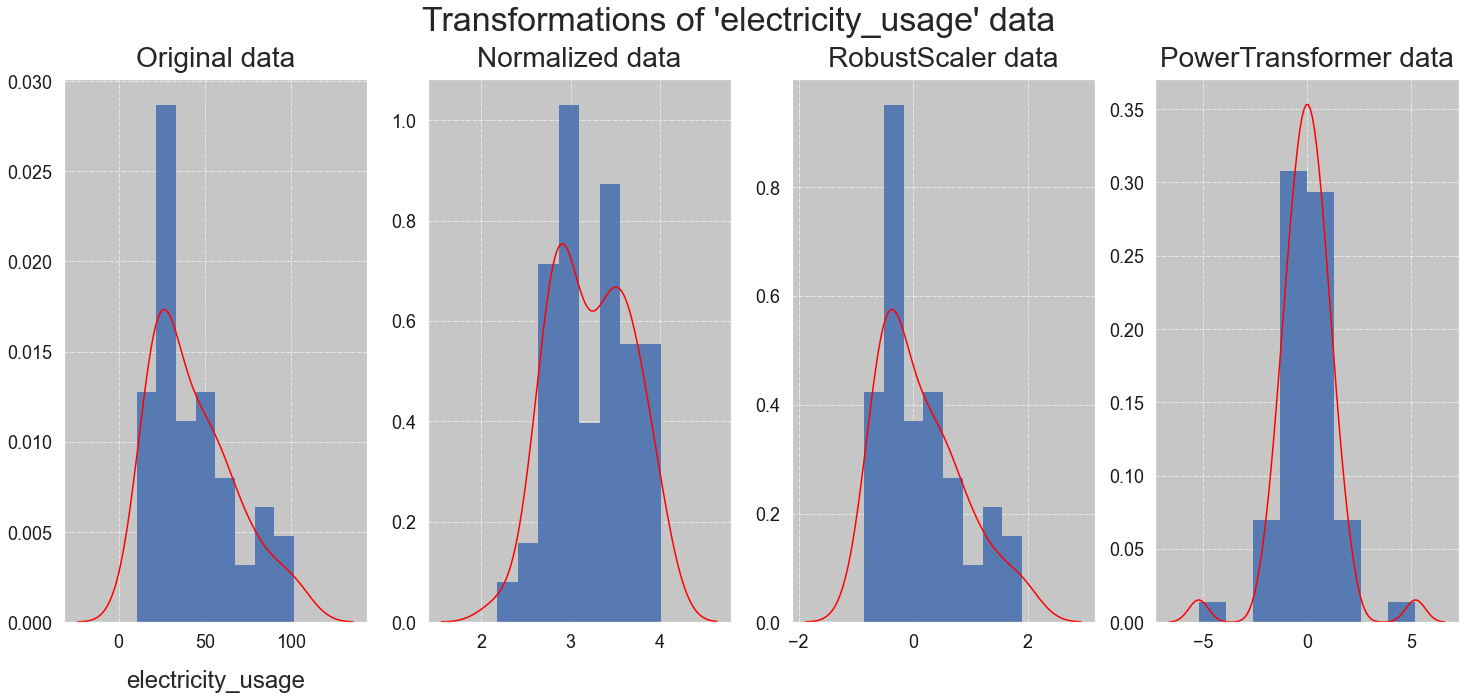

In [20]:
global_plot_sets()
fig = plt.figure(figsize=(25, 10))

ax_ = [fig.add_subplot(1, 4, pos) for pos in range(1, 5)]

from scipy import stats # for Box-Cox Transformation
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

# 
def data_transformations(data_name):
    # reshape data to make 'fit_transform' operations
    data_name_reshape = np.array(data_name).reshape(-1,1)
    
    Normalized_data = stats.boxcox(data_name)
    RobustScaler_data = RobustScaler(quantile_range=(25, 75)).fit_transform(data_name_reshape)
    PowerTransformer_data = QuantileTransformer(output_distribution='normal', n_quantiles=len(data_name)).fit_transform(data_name_reshape)
    Scaled_data = minmax_scale(data_name)
    
    return [data_name, Normalized_data[0], RobustScaler_data, PowerTransformer_data, Scaled_data]

function_titles = ['Original data', 'Normalized data', 'RobustScaler data', 'PowerTransformer data', 'MinMax_scale data']
transformed_energy_data = data_transformations(energy['electricity_usage'])

plt.suptitle("Transformations of 'electricity_usage' data", fontsize = 34)

# MinMax scale plot is not present because its curve shape is the same as the original data
for hist_titles, hist_data, axs in zip(function_titles[0:4], transformed_energy_data[0:4], ax_):
    sns.distplot(hist_data, bins = np.math.ceil(np.sqrt(len(energy['electricity_usage']))),
                 kde_kws={"color": "red", "lw": 1.5},
                 hist_kws={"linewidth": 0, "alpha": 0.9}, ax=axs)
    axs.set_title(hist_titles)

plt.show()

In [13]:
x_temperature = energy['temperature']

# Transformation results presented in one array to use it in the later calculations
transformed_temperature_data = data_transformations(x_temperature)

# Results as the DataFrames
def DataFrame_with_transformation(i):
    X_temperature = np.array(transformed_temperature_data[i]).reshape(-1,1)
    if (i==0 or i==1 or i==4):
        y_transformed = transformed_energy_data[i]
    else:
        y_transformed = transformed_energy_data[i][:, 0]
    return pd.DataFrame({'X': X_temperature.flatten(), 'y': y_transformed})

---

## Polynomial functions using to compare will have degrees between 1. and 5. - higher degree values than 5. could be a reason of overfitting the final model.

# Linear regression methods

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **Polynomial regression** (1. to 5. degrees)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
data = pd.DataFrame(index=np.arange(0, 275, 1),
                    columns=['X', 'y', 'y_poly_predicted', 'RMSE', 'R2', 'poly_degree'])

def poly_regression(k):
    for n in range(1, 6):
        polynomial_features = PolynomialFeatures(degree = n)
        df = DataFrame_with_transformation(k)
        x, y = df.iloc[:, 0:1], df.iloc[:, 1]
        
        x_poly = polynomial_features.fit_transform(x)
        y_poly = model.fit(x_poly, y).predict(x_poly)
        rmse = np.sqrt(mean_squared_error(y, y_poly))
        r2 = r2_score(y, y_poly, multioutput = 'variance_weighted')

        # There are 5 degree values in 'for loop', but to hold all the data in one DataFrame
        # we have to make 55 index positions for every 'n' value 
        # ([0:54] for n=1, [55:109] for n=2, [110:164] for n=3, [165:219] for n=4, [220:274] for n=5).
        # The best way to do this is to find a mathematical dependantion between 'n' and indexes numbers.
        ind = len(df) * (n - 1)
        
        data.iloc[ind: ind + len(df), 0] = df['X'].values
        data.iloc[ind: ind + len(df), 1] = df['y'].values
        data.iloc[ind: ind + len(df), 2] = y_poly
        data.iloc[ind: ind + len(df), 3] = rmse
        data.iloc[ind: ind + len(df), 4] = r2
        data.iloc[ind: ind + len(df), 5] = n
                
    return data

## Before comparing the results we have to remember that the best RMSE value means the lowest (ideally RMSE=0), but the best R2 means the highest value (ideally R2=1).

In [16]:
def best_poly_params(num):
    df_name = poly_regression(num)
    best_index = np.argmax(df_name['R2'])
    best_RMSE, best_R2, best_poly_degree = [df_name.loc[best_index, col_name] for col_name in ['RMSE', 'R2', 'poly_degree']]
    print('For "{}" best values (RMSE={:.3f}, R2={:.3f}) are for n={} polynomial function degree'
          .format(function_titles[num], best_RMSE, best_R2, best_poly_degree), '\n')

# Best results for all regressions with polynomial algorythm made
best_poly_params_results = [best_poly_params(i) for i in np.arange(0,5)]

For "Original data" best values (RMSE=9.294, R2=0.847) are for n=5 polynomial function degree 

For "Normalized data" best values (RMSE=0.187, R2=0.815) are for n=5 polynomial function degree 

For "RobustScaler data" best values (RMSE=0.280, R2=0.847) are for n=5 polynomial function degree 

For "PowerTransformer data" best values (RMSE=0.861, R2=0.595) are for n=5 polynomial function degree 

For "MinMax_scale data" best values (RMSE=0.102, R2=0.847) are for n=5 polynomial function degree 



### All RMSE and R2 results are in the plots below

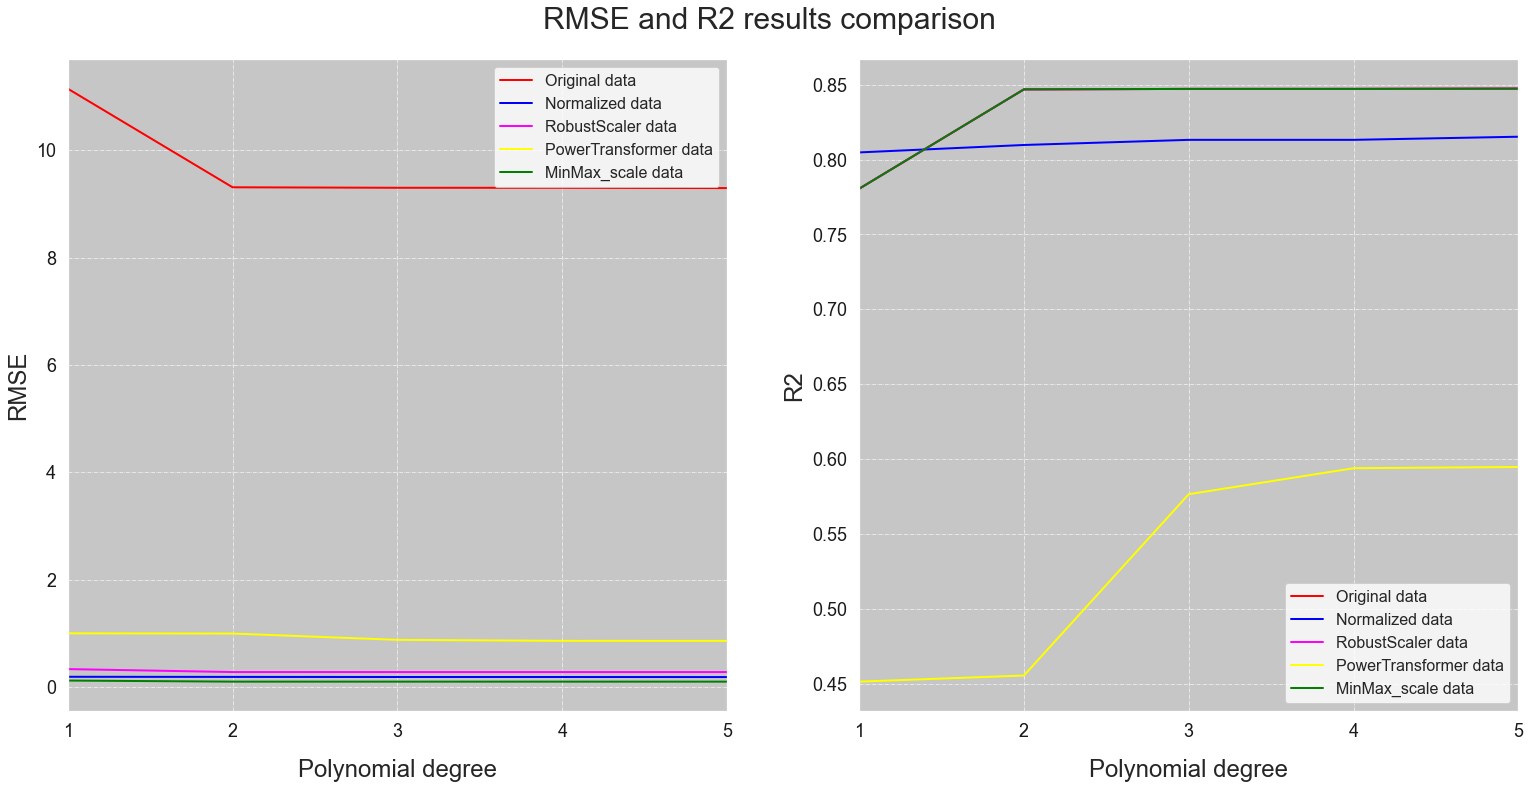

In [17]:
global_plot_sets()
plt.figure(figsize=(26, 12))

## Finding unique value of RMSE or R2 in function by poly degree number
def func_splitted(func, degree, param):
    _ = func.loc[func['poly_degree'] == degree][param]
    param_value = float(np.unique(_))
    return param_value

def params_plot(param):
    indexes_1 = np.arange(0, 5, 1)
    indexes_2 = np.arange(1, 6, 1)
    colors = ['red', 'blue', 'magenta', 'yellow', 'green']
    
    for num, colors, data_type in zip(indexes_1, colors, function_titles):
        # List of RMSE or R2 values for all functions
        y = [func_splitted(poly_regression(num), degree, param) for degree in indexes_2]
        plt.plot(indexes_2, y, linewidth = 2, color = colors, label = data_type)
        plt.xlabel('Polynomial degree')
        plt.ylabel(param, labelpad=6)
        plt.xticks(ticks=indexes_2)
        plt.xlim(1, 5)
        plt.legend()

plt.subplot(121)
params_plot('RMSE')
plt.subplot(122)
params_plot('R2')
        
plt.suptitle('RMSE and R2 results comparison', fontsize=30, y=0.94)

plt.show()

### `'MinMax_scale data'` and `'original data'` give the same R2 values for n=5, but using `'MinMax_scale data'` give us more than 90 times lower RMSE value (0.102 and 9.294), which is the lowest from the all polynomial regression calculation made.

### After making DataFrames we need to reorganize data by ascending order on x-axis - only then it is possible to draw the plots with polynomial approximations properly.

In [18]:
## Sorting x values in the DataFrames

def sorted_x_values(func, i):
    _ = func.loc[func['poly_degree'] == i][['X', 'y_poly_predicted']]
    func_sorted = _.sort_values('X')
    return func_sorted

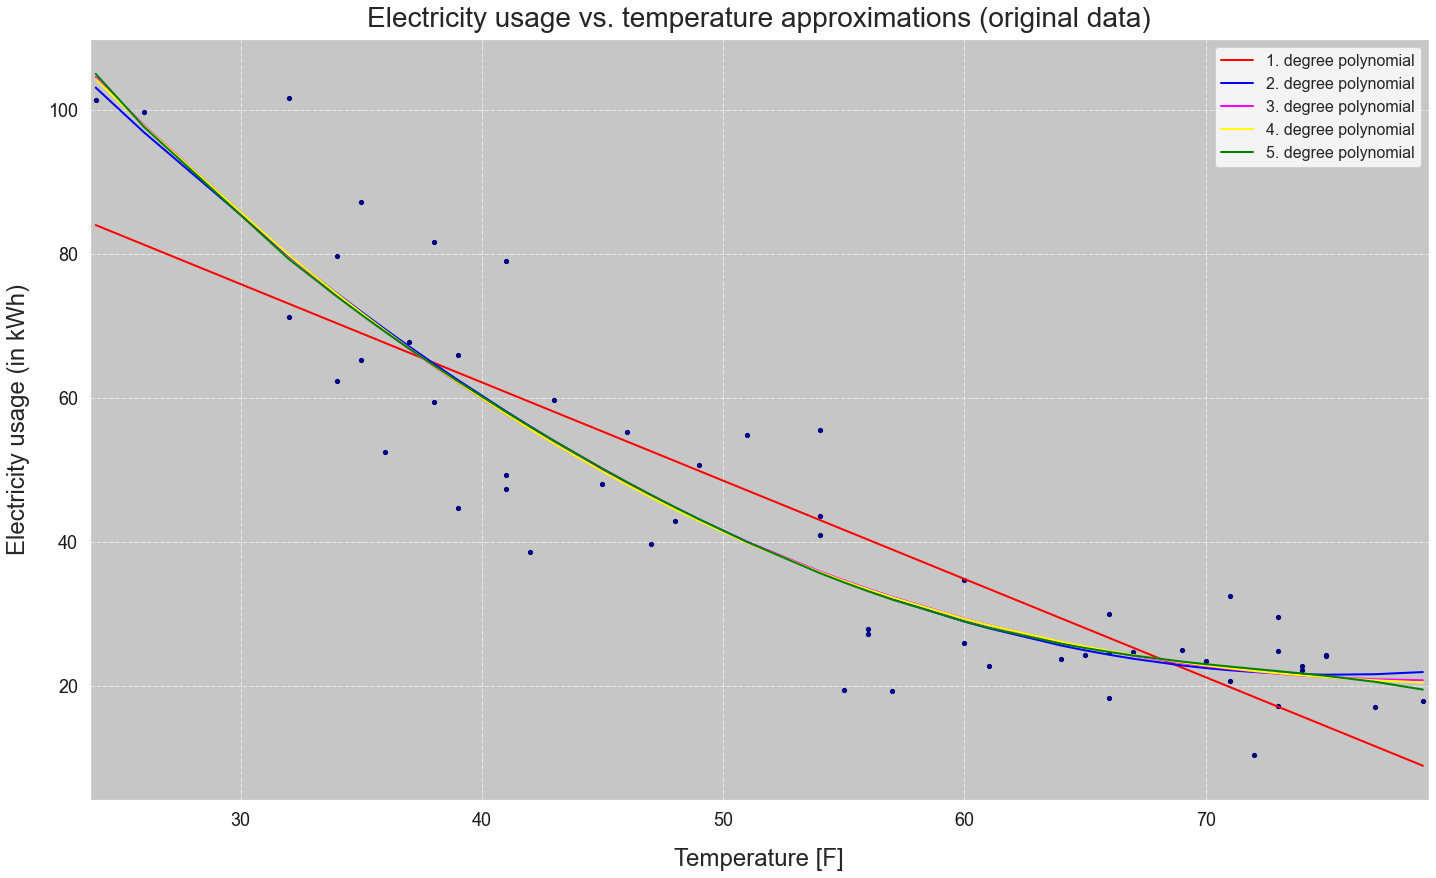

In [19]:
global_plot_sets()
plt.figure(figsize=(24, 14))

numbers_range = np.arange(1, 6)
colors = ['red', 'blue', 'magenta', 'yellow', 'green']
labels_name = [str(x) + '. degree polynomial' for x in numbers_range]

for index_1, index_2, colors in zip(numbers_range-1, numbers_range, colors):
    x_poly_original_sorted = sorted_x_values(poly_regression(0), index_2)
    plt.plot(x_poly_original_sorted['X'], x_poly_original_sorted['y_poly_predicted'],
             linewidth = 2, aa=True, color = colors, label = labels_name[index_1])

plt.scatter(energy['temperature'], energy['electricity_usage'], c = 'navy', marker = 'o', s = 18)
plt.xlabel('Temperature [F]')
plt.ylabel('Electricity usage (in kWh)')
plt.xlim(energy['temperature'].min() - 0.25, energy['temperature'].max() + 0.25)
plt.title('Electricity usage vs. temperature approximations (original data)')
plt.legend()

plt.show()

## **Conclusion**: Optimal polynomial regression method is `'MinMax_scale data'` with ***n***=2 (2. degree polynomial function used) - higher ***n*** values do not give better results, but make final model more complex only.